<a href="https://colab.research.google.com/github/ni-ms/colab-projects/blob/RNN/RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape", x_train.shape)


x_train.shape (60000, 28, 28)


In [ ]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and train

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.7273 - loss: 0.8046 - val_accuracy: 0.8822 - val_loss: 0.3458
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.8944 - loss: 0.3157 - val_accuracy: 0.9021 - val_loss: 0.2934
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9122 - loss: 0.2593 - val_accuracy: 0.9134 - val_loss: 0.2687
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9235 - loss: 0.2279 - val_accuracy: 0.9231 - val_loss: 0.2338
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9317 - loss: 0.2031 - val_accuracy: 0.9294 - val_loss: 0.2180
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.9374 - loss: 0.1835 - val_accuracy: 0.9308 - val_loss: 0.2129
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.9436 - loss: 0.1681 - val_accuracy: 0.9368 - val_loss: 0.1988
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.9472 -

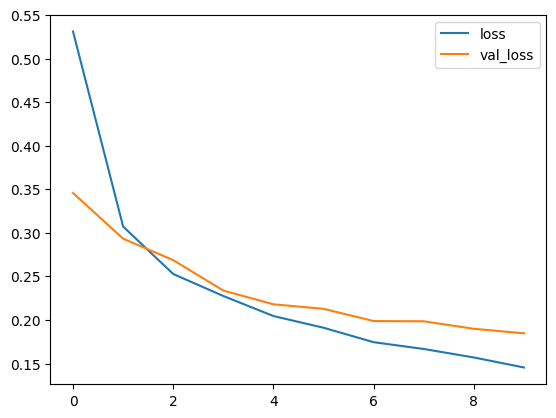

In [ ]:
#Plot the loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

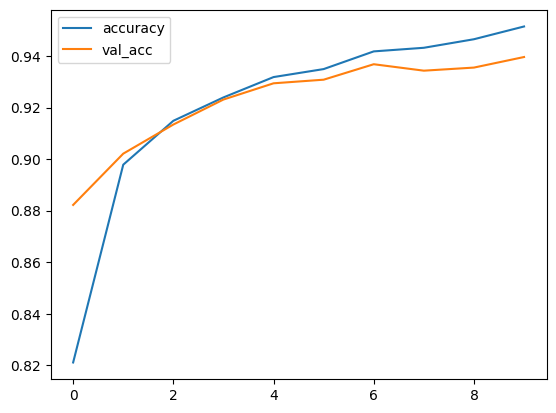

In [ ]:
# Plot the accuracy per iteration

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
Confusion matrix, without normalization
[[ 937    0    1    1    0    6    8    0   27    0]
 [   0 1116    5    1    3    0    1    6    1    2]
 [   3    5  986   10    2    5    5    6    9    1]
 [   0    0    5  947    0   37    0    9    8    4]
 [   1    1    5    0  894    1    3   19    7   51]
 [   1    3    2   54    1  808    7    4    8    4]
 [   3    2    6    0    0    5  937    0    5    0]
 [   0   12    9    1   10    2    1  950    1   42]
 [  13    1   10    2    1    6   10    1  923    7]
 [   0    1    2   14   18    3    0   62   11  898]]
[[ 937    0    1    1    0    6    8    0   27    0]
 [   0 1116    5    1    3    0    1    6    1    2]
 [   3    5  986   10    2    5    5    6    9    1]
 [   0    0    5  947    0   37    0    9    8    4]
 [   1    1    5    0  894    1    3   19    7   51]
 [   1    3    2   54    1  808    7    4    8    4]
 [   3    2    6    0    0    5  937    0    5    0]
 [   0   12    9

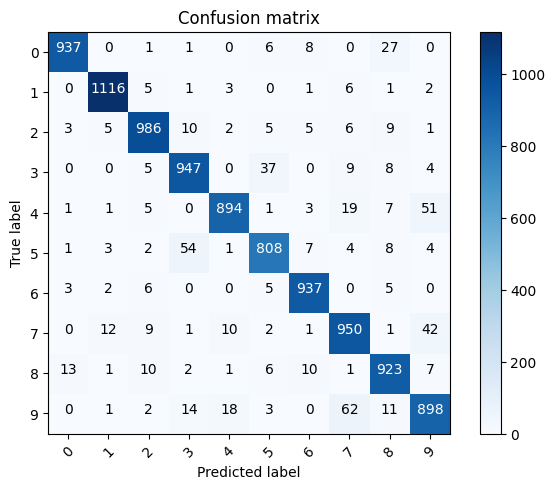

In [ ]:
# Plot the confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix,
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense
# It's easy to confuse 9 & 4, 9 & 7, 2 & 7, etc

Text(0.5, 1.0, 'True label is 7 and misclassified is 9')

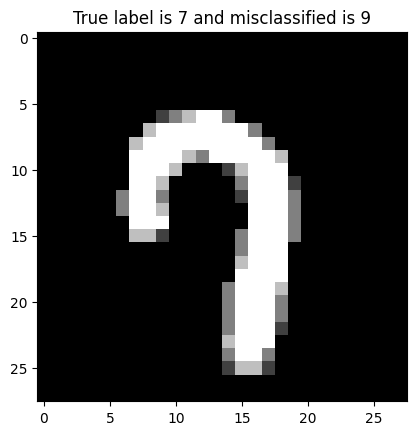

In [ ]:
# Show some misclassified sample
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label is {} and misclassified is {}".format(y_test[i], p_test[i]))